In [31]:
# If you are using this notebook without having loaded any of the following libraries for Python
# You should Uncomment the relevant lines below to install the supporting tools you need
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
#! pip install statsmodels
#! pip install pandas-datareader
#! pip install qeds
#! pip install scikit-learn

In [40]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

from pandas_datareader import DataReader

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

ModuleNotFoundError: No module named 'qeds'

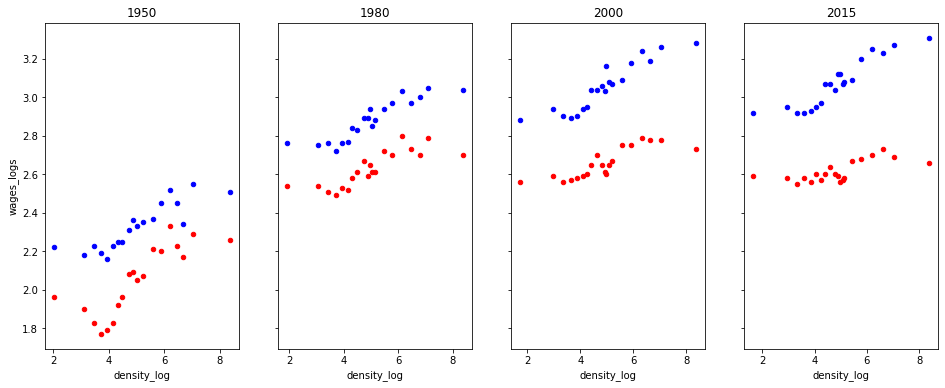

In [41]:
# Read in data
df = pd.read_csv("density_wage_data.csv")
#df = pd.read_csv("https://datascience.quantecon.org/assets/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], "b")
    single_scatter_plot(df, year, "noncollege", ax[i], "r")
    ax[i].set_title(str(year))

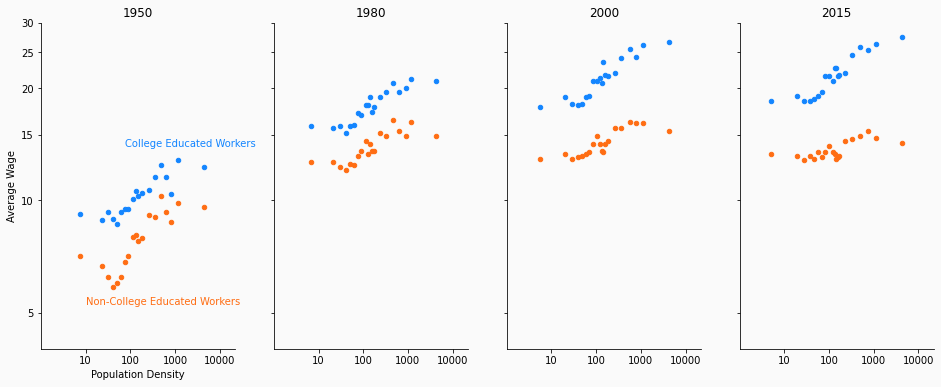

In [43]:
# Clean up the figure
# Read in data
df = pd.read_csv("density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
colors = {"college": "#1385ff", "noncollege": "#ff6d13"}

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], colors["college"])
    single_scatter_plot(df, year, "noncollege", ax[i], colors["noncollege"])
    ax[i].set_title(str(year))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
for (i, _ax) in enumerate(ax):
    # Label with words
    if i == 0:
        _ax.set_xlabel("Population Density")
    else:
        _ax.set_xlabel("")

    # Turn off right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Don't use such a white background color
    _ax.set_facecolor(bgcolor)

    # Change bounds
    _ax.set_ylim((np.log(4), np.log(30)))
    _ax.set_xlim((0, 10))

    # Change ticks
    xticks = [10, 100, 1000, 10000]
    _ax.set_xticks([np.log(xi) for xi in xticks])
    _ax.set_xticklabels([str(xi) for xi in xticks])

    yticks = list(range(5, 32, 5))
    _ax.set_yticks([np.log(yi) for yi in yticks])
    if i == 0:
        _ax.set_yticklabels([str(yi) for yi in yticks])
        _ax.set_ylabel("Average Wage")
    else:
        _ax.set_yticklabels([])
        _ax.set_ylabel("")

ax[0].annotate("College Educated Workers", (np.log(75), np.log(14.0)), color=colors["college"])
ax[0].annotate("Non-College Educated Workers", (np.log(10), np.log(5.25)), color=colors["noncollege"]);
ax[0].set_zorder(1)

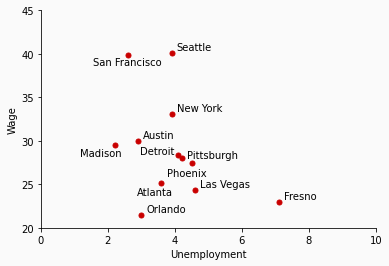

In [44]:
# A little more city-specific insight

cities = [
    "San Francisco", "Austin", "Las Vegas", "New York", "Seattle", "Pittsburgh",
    "Detroit", "Fresno", "Phoenix", "Orlando", "Atlanta", "Madison"
]
unemp_wage = np.array([
    [2.6, 39.89], [2.9, 29.97], [4.6, 24.38], [3.9, 33.09], [3.9, 40.11], [4.2, 27.98],
    [4.1, 28.41], [7.1, 22.96], [4.5, 27.42], [3.0, 21.47], [3.6, 25.19], [2.2, 29.48]
])
df = pd.DataFrame(unemp_wage, index=cities, columns=["Unemployment", "Wage"])

fig, ax = plt.subplots()
df.plot(kind="scatter", x="Unemployment", y="Wage", ax=ax, s=25, color="#c90000")

# Add annotations
for (i, row) in df.iterrows():
    city = row.name

    if city in ["San Francisco", "Madison"]:
        offset = (-35, -10.5)
    elif city in ["Atlanta", "Phoenix", "Madison"]:
        offset = (-25, -12.5)
    elif city in ["Detroit"]:
        offset = (-38, 0)
    elif city in ["Pittsburgh"]:
        offset = (5, 0)
    else:
        offset = (5, 2.5)
    ax.annotate(
        city, xy=(row["Unemployment"], row["Wage"]),
        xytext=offset, textcoords="offset points"
    )

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlim(0, 10)
ax.set_ylim(20, 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

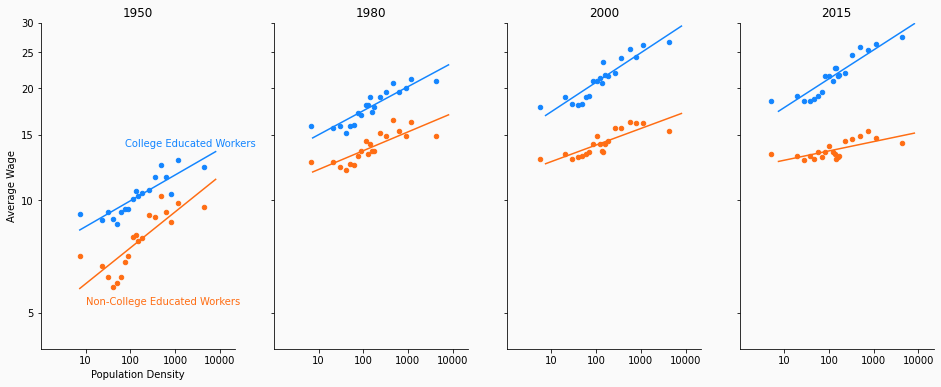

In [46]:
# Try line plots
from sklearn.linear_model import LinearRegression

# Read in data
df = pd.read_csv("density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    lr = LinearRegression()
    X = _df["density_log"].values.reshape(-1, 1)
    y = _df["wages_logs"].values.reshape(-1, 1)
    lr.fit(X, y)

    x = np.linspace(2.0, 9.0).reshape(-1, 1)
    y_pred = lr.predict(x)
    ax.plot(x, y_pred, color=color)

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
colors = {"college": "#1385ff", "noncollege": "#ff6d13"}

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], colors["college"])
    single_scatter_plot(df, year, "noncollege", ax[i], colors["noncollege"])
    ax[i].set_title(str(year))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
for (i, _ax) in enumerate(ax):
    # Label with words
    if i == 0:
        _ax.set_xlabel("Population Density")
    else:
        _ax.set_xlabel("")

    # Turn off right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Don't use such a white background color
    _ax.set_facecolor(bgcolor)

    # Change bounds
    _ax.set_ylim((np.log(4), np.log(30)))
    _ax.set_xlim((0, 10))

    # Change ticks
    xticks = [10, 100, 1000, 10000]
    _ax.set_xticks([np.log(xi) for xi in xticks])
    _ax.set_xticklabels([str(xi) for xi in xticks])

    yticks = list(range(5, 32, 5))
    _ax.set_yticks([np.log(yi) for yi in yticks])
    if i == 0:
        _ax.set_yticklabels([str(yi) for yi in yticks])
        _ax.set_ylabel("Average Wage")
    else:
        _ax.set_yticklabels([])
        _ax.set_ylabel("")

ax[0].annotate("College Educated Workers", (np.log(75), np.log(14.0)), color=colors["college"])
ax[0].annotate("Non-College Educated Workers", (np.log(10), np.log(5.25)), color=colors["noncollege"])
ax[0].set_zorder(1)

# Compare Autor's Ely Lecture at the 2019 AAEA Meetings
# https://www.aeaweb.org/webcasts/2019/aea-distinguished-lecture-work-of-the-past-work-of-the-future

Text(0.5, 1.0, 'Unemployment Rate in US Cities')

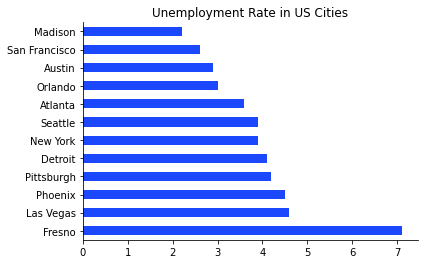

In [29]:
# Bar charts
cities = [
    "San Francisco", "Austin", "Las Vegas", "New York", "Seattle", "Pittsburgh",
    "Detroit", "Fresno", "Phoenix", "Orlando", "Atlanta", "Madison"
]
unemp_wage = np.array([
    [2.6, 39.89], [2.9, 29.97], [4.6, 24.38], [3.9, 33.09], [3.9, 40.11], [4.2, 27.98],
    [4.1, 28.41], [7.1, 22.96], [4.5, 27.42], [3.0, 21.47], [3.6, 25.19], [2.2, 29.48]
])
df = pd.DataFrame(unemp_wage, index=cities, columns=["Unemployment", "Wage"])
df = df.sort_values(["Unemployment"], ascending=False)

fig, ax = plt.subplots()

df["Unemployment"].plot(kind="barh", ax=ax, color="#1b48fc")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Unemployment Rate in US Cities")

Text(0.5, 1.0, 'US GDP Growth from 1948-2019')

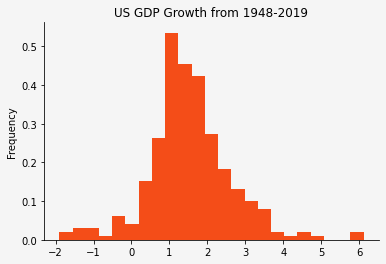

In [47]:
# GDP quarterly growth
gdp = DataReader("GDP", "fred", 1948, 2019).pct_change().dropna()
gdp = gdp * 100

fig, ax = plt.subplots()
gdp.plot(
    kind="hist", y="GDP", color=(244/255, 77/255, 24/255),
    bins=23, legend=False, density=True, ax=ax
)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("US GDP Growth from 1948-2019")